In [16]:
import pandas as pd

# 출력 설정 변경
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', 1000)  # 출력 가능한 너비 설정

# 파일 경로와 시트 지정
file_path = r'C:\Users\zer12\Desktop\git-test\1LEE3KIM\연봉별 퇴사율 조사.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 엑셀 파일의 첫 5개 행 출력
print("Step 1: 엑셀 파일 읽기")
print(df)  # 엑셀 파일의 첫 5개 행 출력
print("\n")


Step 1: 엑셀 파일 읽기
    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7     Unnamed: 8
0          NaN        회사명       평균연봉          총         IN        OUT        입사율        퇴사율            기준 
1          NaN      S-Oil   15,698만원     3,462명        10명        13명      0.047      0.012  23.11 ~ 24.11
2          NaN      SK텔레콤   12,095만원     5,255명         0명         0명          0          0  23.11 ~ 24.11
3          NaN       삼성화재   12,578만원     5,597명        29명        22명      0.035      0.024  23.11 ~ 24.11
4          NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN            NaN
5          NaN      넥슨코리아    7,071만원     3,919명        77명        68명      0.057      0.043  23.11 ~ 24.11
6          NaN       셀트리온    7,125만원     2,718명        48명        17명      0.124      0.036  23.11 ~ 24.11
7          NaN     한미사이언스    7,012만원       439명         6명         7명      0.082       0.05  23.11 ~ 24.11
8          NaN      

In [17]:
# Step 2: 데이터 정리 (회사명과 퇴사율 열만 사용)
df_cleaned = df[['Unnamed: 1', 'Unnamed: 7']].dropna()  # 회사명과 퇴사율 열만 사용
df_cleaned.columns = ['회사명', '퇴사율']  # 컬럼명 수정

print("Step 2: 데이터 정리")
print(df_cleaned)  # 정리된 데이터 출력
print("\n")


Step 2: 데이터 정리
       회사명    퇴사율
0      회사명    퇴사율
1    S-Oil  0.012
2    SK텔레콤      0
3     삼성화재  0.024
5    넥슨코리아  0.043
6     셀트리온  0.036
7   한미사이언스   0.05
9     홈플러스  0.077
10    롯데쇼핑  0.163
11   메가스터디  0.062




In [18]:
# Step 3: '퇴사율'을 숫자형으로 변환
df_cleaned['퇴사율'] = pd.to_numeric(df_cleaned['퇴사율'], errors='coerce')  # 숫자형으로 변환

print("Step 3: '퇴사율' 숫자형으로 변환")
print(df_cleaned)  # 변환된 데이터 출력
print("\n")


Step 3: '퇴사율' 숫자형으로 변환
       회사명    퇴사율
0      회사명    NaN
1    S-Oil  0.012
2    SK텔레콤  0.000
3     삼성화재  0.024
5    넥슨코리아  0.043
6     셀트리온  0.036
7   한미사이언스  0.050
9     홈플러스  0.077
10    롯데쇼핑  0.163
11   메가스터디  0.062




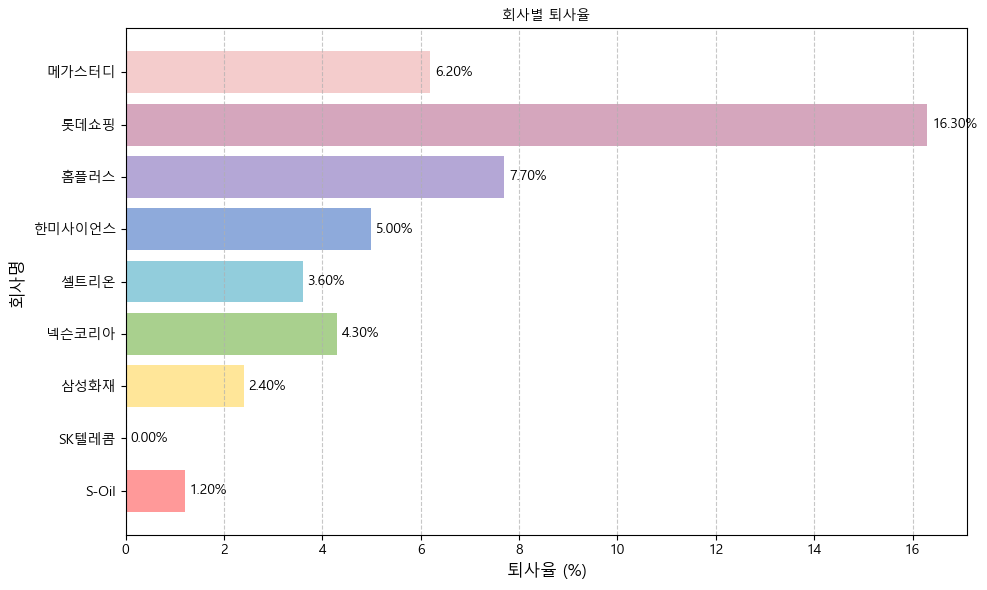

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 준비
company_names = ['S-Oil', 'SK텔레콤', '삼성화재', '넥슨코리아', '셀트리온', '한미사이언스', '홈플러스', '롯데쇼핑', '메가스터디']
turnover_rates = [1.20, 0.00, 2.40, 4.30, 3.60, 5.00, 7.70, 16.30, 6.20]  # 퇴사율
colors = ['#FF9999', '#FFC000', '#FFE699', '#A9D08E', '#92CDDC', '#8EAADB', '#B4A7D6', '#D5A6BD', '#F4CCCC']  # 각 막대 색상

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 기본 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(company_names, turnover_rates, color=colors)  # 막대 그래프에 색상 적용
plt.xlabel('퇴사율 (%)', fontsize=12, fontproperties=font_prop)
plt.ylabel('회사명', fontsize=12, fontproperties=font_prop)
plt.title('회사별 퇴사율', fontsize=15, fontproperties=font_prop)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# 퇴사율 값 텍스트로 표시
for i, v in enumerate(turnover_rates):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center', fontsize=10, fontproperties=font_prop)

plt.tight_layout()
plt.show()
